In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 22s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

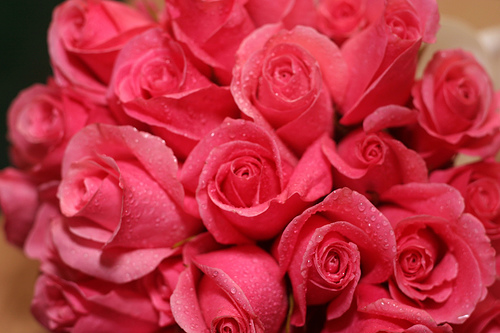

In [9]:
PIL.Image.open(str(roses[56]))

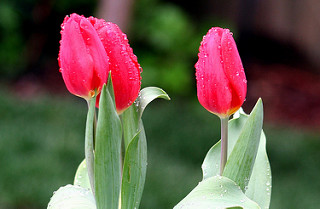

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

# Train test split


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images


In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 [==============================] - 34s 387ms/step - loss: 1.2731 - accuracy: 0.4666
Epoch 2/30
86/86 [==============================] - 37s 434ms/step - loss: 0.9246 - accuracy: 0.6450
Epoch 3/30
86/86 [==============================] - 39s 451ms/step - loss: 0.7253 - accuracy: 0.7315
Epoch 4/30
86/86 [==============================] - 39s 457ms/step - loss: 0.4967 - accuracy: 0.8219
Epoch 5/30
86/86 [==============================] - 40s 462ms/step - loss: 0.2854 - accuracy: 0.9019
Epoch 6/30
86/86 [==============================] - 41s 475ms/step - loss: 0.1778 - accuracy: 0.9382
Epoch 7/30
29/86 [=========>....................] - ETA: 28s - loss: 0.1005 - accuracy: 0.9666

KeyboardInterrupt: 

# Note : ran less epoch due to time issue run ,around epoch=30

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 86ms/step - loss: 1.5037 - accuracy: 0.6275


[1.5036674737930298, 0.6274510025978088]

#Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [23]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 7.086641  ,  8.674782  ,  3.6687357 , -9.267984  , -1.0060915 ],
       [ 5.8439875 ,  2.506791  , -2.5927913 , -3.124822  ,  2.9870884 ],
       [-2.1434155 ,  1.0605891 ,  9.310007  , -5.4261165 , -2.2158635 ],
       ...,
       [ 0.7847824 , -2.559231  , -5.3970737 ,  4.744111  ,  2.2926261 ],
       [ 1.0991217 ,  2.1877244 , -0.92570674,  0.68993604,  1.4674201 ],
       [-3.1925292 , -8.215763  ,  0.02486128,  5.6753397 ,  0.78365153]],
      dtype=float32)

In [24]:

score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

# Improve Test Accuracy Using Data Augmentation


In [28]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Original Image



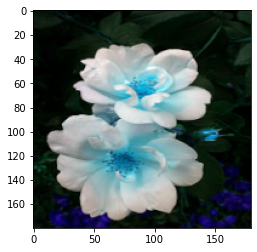

In [29]:

plt.imshow(X[0])

**Newly generated training sample using data augmentation**

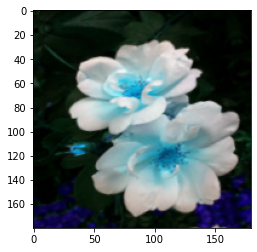

In [30]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


# Train the model using data augmentation and a drop out layer


In [31]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 [==============================] - 38s 435ms/step - loss: 1.2815 - accuracy: 0.4495
Epoch 2/10
86/86 [==============================] - 42s 484ms/step - loss: 1.0469 - accuracy: 0.5850
Epoch 3/10
86/86 [==============================] - 45s 525ms/step - loss: 0.9376 - accuracy: 0.6185
Epoch 4/10
86/86 [==============================] - 47s 551ms/step - loss: 0.8469 - accuracy: 0.6661
Epoch 5/10
86/86 [==============================] - 53s 621ms/step - loss: 0.7952 - accuracy: 0.6897
Epoch 6/10
86/86 [==============================] - 55s 637ms/step - loss: 0.7327 - accuracy: 0.7198
Epoch 7/10
86/86 [==============================] - 52s 604ms/step - loss: 0.6975 - accuracy: 0.7271
Epoch 8/10
86/86 [==============================] - 55s 634ms/step - loss: 0.6489 - accuracy: 0.7467
Epoch 9/10
86/86 [==============================] - 55s 634ms/step - loss: 0.6283 - accuracy: 0.7562
Epoch 10/10
86/86 [==============================] - 54s 631ms/step - loss: 0.6222 - accura

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 143ms/step - loss: 0.8733 - accuracy: 0.6819


[0.8732886910438538, 0.6819171905517578]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**